In [2]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt

#states = PATH1, PATH2, PATH3, PATH4 = 0, 1, 2, 3

V = np.array([3, 3, 2, 1, 2, 2, 1, 2, 3, 0])

# Transition Probabilities
A = np.array(((0.3, 0.2, 0.2, 0.3), (0.2, 0.3, 0.2, 0.3), (0.2, 0.2, 0.3, 0.3), (0.2, 0.2, 0.2, 0.4)))

# Emission Probabilities
B = np.array(((0.3, 0.3, 0.3, 0.1), (0.3, 0.3, 0.3, 0.1), (0.3, 0.3, 0.3, 0.1), (0.1, 0.1, 0.1, 0.7)))

# Equal Probabilities for the initial distribution
pi = np.array((0.2, 0.2, 0.2, 0.4))


def forward(V, A, B, pi):
    #We create an empty Alpha array 10 (lines) x 4 (cols)
    alpha = np.zeros((V.shape[0], A.shape[0]))
    alpha[0, :] = pi * B[:, V[0]]

    for t in range(1, V.shape[0]):
        for j in range(A.shape[0]):
            
            alpha[t, j] = alpha[t - 1].dot(A[:, j]) * B[j, V[t]]

    return alpha


alpha = forward(V, A, B, pi)
print(alpha)

[[2.00000000e-02 2.00000000e-02 2.00000000e-02 2.80000000e-01]
 [7.00000000e-03 7.00000000e-03 7.00000000e-03 9.10000000e-02]
 [6.93000000e-03 6.93000000e-03 6.93000000e-03 4.27000000e-03]
 [1.71150000e-03 1.71150000e-03 1.71150000e-03 7.94500000e-04]
 [4.07085000e-04 4.07085000e-04 4.07085000e-04 1.85815000e-04]
 [9.66367500e-05 9.66367500e-05 9.66367500e-05 4.40702500e-05]
 [2.29379325e-05 2.29379325e-05 2.29379325e-05 1.04601175e-05]
 [5.44457288e-06 5.44457288e-06 5.44457288e-06 2.48281863e-06]
 [4.30776474e-07 4.30776474e-07 4.30776474e-07 4.12527013e-06]
 [3.37979267e-07 3.37979267e-07 3.37979267e-07 2.03780688e-07]]


In [3]:
def backward(V, A, B):
    beta = np.zeros((V.shape[0], A.shape[0]))

    # setting beta(T) = 1
    beta[V.shape[0] - 1] = np.ones((A.shape[0]))

    # Loop in backward way from T-1 to
    # Due to python indexing the actual loop will be T-2 to 0
    for t in range(V.shape[0] - 2, -1, -1):
        for j in range(A.shape[0]):
            beta[t, j] = (beta[t + 1] * B[:, V[t + 1]]).dot(A[j, :])

    return beta


beta = backward(V, A, B)
print(beta)

[[3.06232167e-06 3.06232167e-06 3.06232167e-06 3.69278282e-06]
 [1.17093821e-05 1.17093821e-05 1.17093821e-05 1.06793567e-05]
 [4.93315275e-05 4.93315275e-05 4.93315275e-05 4.49920450e-05]
 [2.07833250e-04 2.07833250e-04 2.07833250e-04 1.89551500e-04]
 [8.75595000e-04 8.75595000e-04 8.75595000e-04 7.98610000e-04]
 [3.68850000e-03 3.68850000e-03 3.68850000e-03 3.36700000e-03]
 [1.55100000e-02 1.55100000e-02 1.55100000e-02 1.43800000e-02]
 [6.30000000e-02 6.30000000e-02 6.30000000e-02 7.60000000e-02]
 [2.40000000e-01 2.40000000e-01 2.40000000e-01 2.20000000e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]]


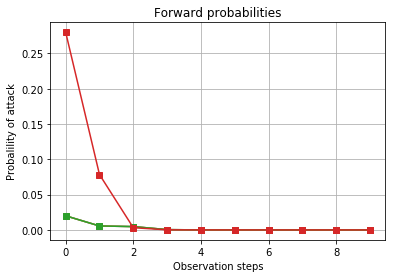

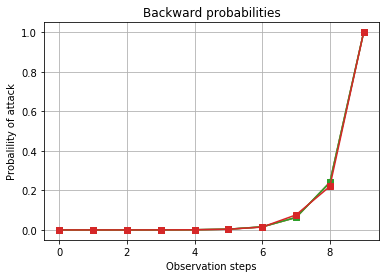

In [24]:
plt1 = plt.figure(1) # je crée une figure dont le numéro 1
plt.plot(alpha, '-s')
#plt1=plt.subplot(121)
#plt1.set_title('graphe 1')
plt.xlabel('Observation steps')
plt.ylabel('Probalility of attack')
plt.title('Forward probabilities')
#plt.legend(("Alpha"), 'best')

plt.grid(True)

plt.figure(2) # je crée une figure dont le numéro 2
plt.plot(beta, '-s')
plt.xlabel('Observation steps')
plt.ylabel('Probalility of attack')
plt.title('Backward probabilities')
#plt.subplot(122)

plt.grid(True)

plt.show()

In [5]:
alpha[:,:]

array([[2.00000000e-02, 2.00000000e-02, 2.00000000e-02, 2.80000000e-01],
       [7.00000000e-03, 7.00000000e-03, 7.00000000e-03, 9.10000000e-02],
       [6.93000000e-03, 6.93000000e-03, 6.93000000e-03, 4.27000000e-03],
       [1.71150000e-03, 1.71150000e-03, 1.71150000e-03, 7.94500000e-04],
       [4.07085000e-04, 4.07085000e-04, 4.07085000e-04, 1.85815000e-04],
       [9.66367500e-05, 9.66367500e-05, 9.66367500e-05, 4.40702500e-05],
       [2.29379325e-05, 2.29379325e-05, 2.29379325e-05, 1.04601175e-05],
       [5.44457288e-06, 5.44457288e-06, 5.44457288e-06, 2.48281863e-06],
       [4.30776474e-07, 4.30776474e-07, 4.30776474e-07, 4.12527013e-06],
       [3.37979267e-07, 3.37979267e-07, 3.37979267e-07, 2.03780688e-07]])

In [17]:
states = PATH1, PATH2, PATH3, PATH4 = 0, 1, 2, 3

#observations = [PATH4, PATH4, PATH3, PATH2, PATH3, PATH3,PATH2, PATH3, PATH4, PATH1]
#V = observations = [3, 3, 2, 1, 2, 2, 1, 2, 3, 0]

backpointers = np.zeros((len(V), len(states)), 'int')

def viterbi(params, observations):
    global backpointers, score, ss
    pi, A, B = params
    M = len(observations)
    S = pi.shape[0]
    
    alpha = np.zeros((M, S))
    alpha[:,:] = float('-inf')
    backpointers = np.zeros((M, S), 'int')
    
    # base case
    alpha[0, :] = pi * B[:,observations[0]]
    
    # recursive case
    for t in range(1, M):
        for s2 in range(S):
            for s1 in range(S):
                score = alpha[t-1, s1] * A[s1, s2] * B[s2, observations[t]]
                if score > alpha[t, s2]:
                    alpha[t, s2] = score
                    backpointers[t, s2] = s1
    
    # now follow backpointers to resolve the state sequence
    ss = []
    ss.append(np.argmax(alpha[M-1,:]))
    for i in range(M-1, 0, -1):
        ss.append(backpointers[i, ss[-1]])
        
    return list(reversed(ss)), np.max(alpha[M-1,:])

In [18]:
viterbi((pi, A, B), V)

([3, 3, 0, 0, 0, 0, 0, 0, 3, 0], 3.4998578495999976e-10)

In [19]:
ss

[0, 3, 0, 0, 0, 0, 0, 0, 3, 3]

In [20]:
score

2.3332385663999986e-10

In [21]:
backpointers

array([[0, 0, 0, 0],
       [3, 3, 3, 3],
       [3, 3, 3, 3],
       [0, 1, 2, 0],
       [0, 1, 2, 0],
       [0, 1, 2, 0],
       [0, 1, 2, 0],
       [0, 1, 2, 0],
       [0, 1, 2, 0],
       [3, 3, 3, 3]])

In [22]:
alpha

array([[2.00000000e-02, 2.00000000e-02, 2.00000000e-02, 2.80000000e-01],
       [5.60000000e-03, 5.60000000e-03, 5.60000000e-03, 7.84000000e-02],
       [4.70400000e-03, 4.70400000e-03, 4.70400000e-03, 3.13600000e-03],
       [4.23360000e-04, 4.23360000e-04, 4.23360000e-04, 1.41120000e-04],
       [3.81024000e-05, 3.81024000e-05, 3.81024000e-05, 1.27008000e-05],
       [3.42921600e-06, 3.42921600e-06, 3.42921600e-06, 1.14307200e-06],
       [3.08629440e-07, 3.08629440e-07, 3.08629440e-07, 1.02876480e-07],
       [2.77766496e-08, 2.77766496e-08, 2.77766496e-08, 9.25888320e-09],
       [8.33299488e-10, 8.33299488e-10, 8.33299488e-10, 5.83309642e-09],
       [3.49985785e-10, 3.49985785e-10, 3.49985785e-10, 2.33323857e-10]])